In [1]:
from dataset import FlowerDataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [2]:
train_dir = "/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/train"
test_dir = "/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/test"

In [3]:
train_dataset = FlowerDataset(train_dir, "histogram", 16)
test_dataset = FlowerDataset(test_dir, "histogram", 16)

In [4]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None], 
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [5]:
log_r = LogisticRegression(max_iter=3000, random_state=42) 
grid_searchcv = GridSearchCV(log_r, param_grid, cv=5, scoring='f1_macro')
grid_searchcv.fit(train_dataset.features, train_dataset.labels)

/home/huatansang/.local/lib/python3.10/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/home/huatansang/.local/lib/python3.10/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000, random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1_macro')

In [8]:
print(grid_searchcv.best_params_)
print(grid_searchcv.best_score_)
print(grid_searchcv.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear'}
0.8114765234765235
LogisticRegression(max_iter=3000, random_state=42, solver='liblinear')


In [11]:
y_pred = grid_searchcv.best_estimator_.predict(test_dataset.features)

In [13]:
f1 = f1_score(test_dataset.labels, y_pred, average='macro')
accuracy = accuracy_score(test_dataset.labels, y_pred)

In [20]:
print(f"F1-macro: {f1}")
print(f"Accuracy: {accuracy}")

F1-macro: 0.860228832951945
Accuracy: 0.86


In [16]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

In [17]:
report = classification_report(test_dataset.labels, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.77      1.00      0.87        10
           2       0.89      0.80      0.84        10
           3       0.80      0.80      0.80        10
           4       0.89      0.80      0.84        10

    accuracy                           0.86        50
   macro avg       0.87      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



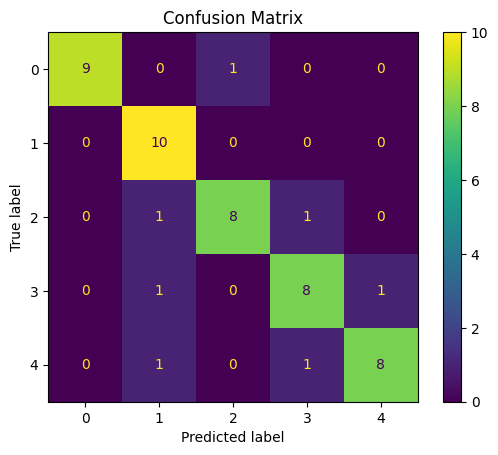

In [19]:
cm = confusion_matrix(test_dataset.labels, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title("Confusion Matrix")
plt.show()